In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 200)

In [34]:
folder_path = 'silhouette_dfs/'
dfs_all_sil = pd.DataFrame()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if '456' not in filename: 
        df = pd.read_csv(file_path)
        df['filename'] = filename
        dfs_all_sil = pd.concat([dfs_all_sil, df], axis=0)


dfs_all_sil = dfs_all_sil.drop(columns=['Unnamed: 0'])
dfs_all_sil['df_mode'] = dfs_all_sil['filename'].apply(lambda x: x.split('-')[1].split('_')[1])
dfs_all_sil['return_mode'] = dfs_all_sil['filename'].apply(lambda x: x.split('_')[3])
dfs_all_sil['linkage'] = dfs_all_sil['linkage'].fillna('not_applicable')


dfs_all_sil.to_csv('clustering_eval_results.csv')

In [ ]:
dfs_all_sil.sort_values(by='silhouette_score', ascending=False)

,clusters,silhouette_score,method,linkage,return_mode,n_init,smoothing,window_size/span,filename,inertia,df_mode
1,5,0.616122,kshape,not_applicable,arithmetic,3,moving_average,30,kshape_moving_average_arithmetic_windowsize-30...,0.016550,weekly.csv
6,6,0.604888,ahc,average,geometric,3,moving_average,30,ahc_moving_average_geometric_windowsize-30_wee...,NaN,weekly.csv
0,4,0.582266,kshape,not_applicable,arithmetic,3,moving_average,30,kshape_moving_average_arithmetic_windowsize-30...,0.020638,weekly.csv
0,4,0.579029,kmeans,not_applicable,geometric,3,moving_average,30,kmeans_moving_average_geometric_windowsize-30_...,1.283079,weekly.csv
7,7,0.574291,ahc,average,geometric,3,moving_average,30,ahc_moving_average_geometric_windowsize-30_wee...,NaN,weekly.csv
...,...,...,...,...,...,...,...,...,...,...,...
2,6,-0.240034,kshape,not_applicable,geometric,3,moving_average,30,kshape_moving_average_geometric_windowsize-30_...,0.010522,weekly.csv
3,7,-0.296101,kshape,not_applicable,geometric,3,moving_average,30,kshape_moving_average_geometric_windowsize-30_...,0.011145,weekly.csv
1,5,-0.315591,ahc,single,geometric,3,moving_average,60,ahc_moving_average_geometric_windowsize-60_3da...,NaN,3day.csv
2,6,-0.338285,ahc,single,geometric,3,moving_average,60,ahc_moving_average_geometric_windowsize-60_3da...,NaN,3day.csv


In [ ]:
def base_visual(df, )

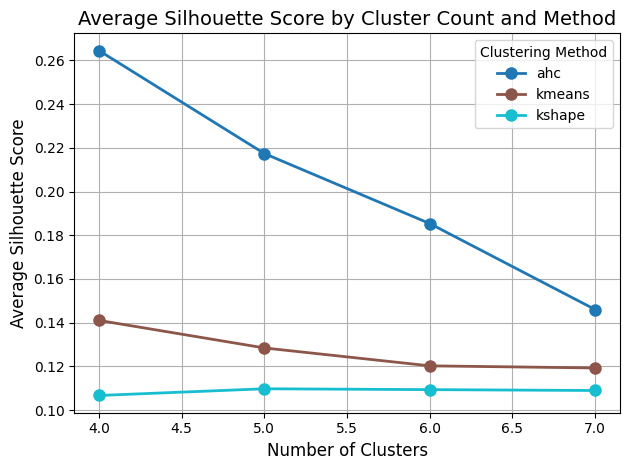

In [33]:
cluster_method_scores = dfs_all_sil.groupby(['clusters', 'method'])['silhouette_score'].mean().reset_index()
methods = list(dfs_all_sil['method'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(methods)))


for i, method in enumerate(methods):
    method_data = cluster_method_scores[cluster_method_scores['method'] == method]
    plt.plot(method_data['clusters'], method_data['silhouette_score'],
              
             marker='o', linestyle='-', linewidth=2, markersize=8,
             color=colors[i], label=method)




plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.title('Average Silhouette Score by Cluster Count and Method', fontsize=14)
plt.legend(title='Clustering Method')
plt.grid(True)
plt.tight_layout()
plt.savefig('silhouette_by_clusters_and_method.png', dpi=300)
plt.show()

In [7]:
x = dfs_all_sil.groupby(by=['method', 'window_size/span'])['silhouette_score'].mean()
pd.DataFrame(x)

silhouette_score
method window_size/span                  
ahc    3                         0.176464
       7                         0.220252
       10                        0.203185
       14                        0.202288
       21                        0.186192
       30                        0.230353
       60                        0.204818
kmeans 3                         0.033833
       7                         0.071319
       10                        0.084753
       14                        0.118078
       21                        0.197587
       30                        0.307431
       60                        0.229079
kshape 3                         0.147639
       7                         0.130361
       10                        0.115260
       14                        0.097272
       21                        0.082382
       30                        0.125145
       60                        0.039729

In [9]:
pd.pivot_table(dfs_all_sil, values="silhouette_score", index=["window_size/span", 'clusters', 'return_mode', 'df_mode'], columns=["method"]).head(10)

method                                                 ahc    kmeans    kshape
window_size/span clusters return_mode df_mode                                 
3                4        arithmetic  3day.csv    0.246032  0.044273  0.141435
                                      full.csv    0.283923  0.031142  0.160204
                                      weekly.csv  0.171526  0.034606  0.110085
                          geometric   3day.csv    0.237037  0.023007  0.150172
                                      full.csv    0.249066  0.024515  0.162120
                                      weekly.csv  0.146415  0.059137  0.107238
                 5        arithmetic  3day.csv    0.179912  0.027140  0.168661
                                      full.csv    0.216265  0.039994  0.098835
                                      weekly.csv  0.138323  0.032896  0.128322
                          geometric   3day.csv    0.231935  0.023006  0.121684